<h2> Campionat de handbal feminin </h2>
<h4> Regulile campionatului sunt:</h4>
<ul>
    <li>Sunt 5 echipe care participa. (Mi-a fost lene sa bag 10)</li>
    <li>Fiecare echipa are in lot 7 jucatoare.</li>
    <li>Echipele joaca cate <i>2 meciuri</i> una impotriva celeilalte, o data acasa si o data in deplasare. </li>
    <li>Fiecare jucatoare are anumite statistici: 
        <ol>
            <li>de cate ori trage la poarta intr-un meci</li> 
            <li>sansa de reusita cand trage la poarta</li>
            <li>sansa de accidentare</li>
            <li>pozitia pe care joaca</li>
            <li>sansa de reusita la loviturile de 7 metri.</li>
        </ol>
    </li>
    <li>Punctele in clasament sunt: 3p pentru victorie, 1p pentru egalitate si 0p pentru infrangere.</li>
    <li>La fiecare accidentare, se acorda si o lovitura de la 7 metri, pe care o executa o jucatoare aleasa la intamplare si pe care o poate apara portarita.</li>
</ul><br>
<h4 style="color:chocolate;">Am ales sa modelez numarul de goluri folosind o distributie binomiala:<br> Care este probabilitatea ca o jucatoare sa dea x goluri din (1) incercari, avand proabilitatea (2), unde (1), (2) sunt statisticile jucatoarei.</h4>
<h4>Parametri care schima distributia sunt:</h4>
<ul>
    <li>Cand o echipa joaca acasa, are parte de sustinatori, care le maresc jucatoarelor cu 20% sansa de reusita (2).</li>
    <li>Daca o jucatoare se accidenteaza, din lipsa de sportivi in Romania, nu este inlocuita cu nimeni dar celelalte jucatoare primesc cate o superputere, in functie de pozitia pe care joaca.</li>
    <li>Exista 15% sansa ca o jucatoare sa aiba o zi rea, astfel primid -30% din statistici.</li>
</ul>

Privire de ansamblu:


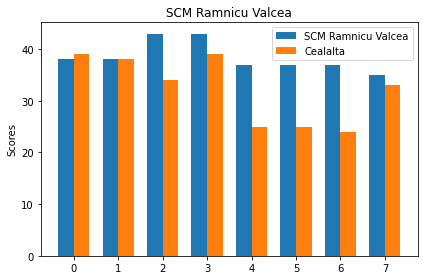

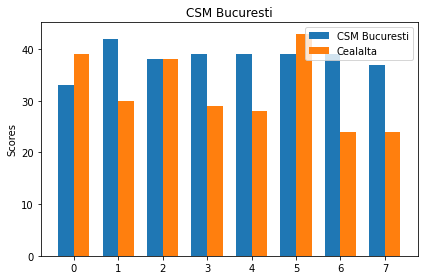

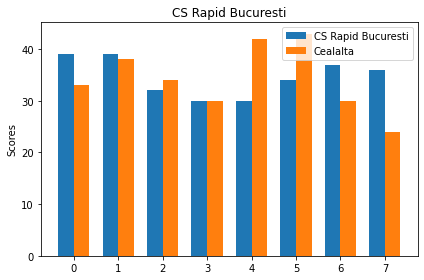

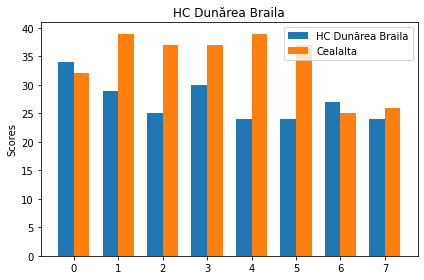

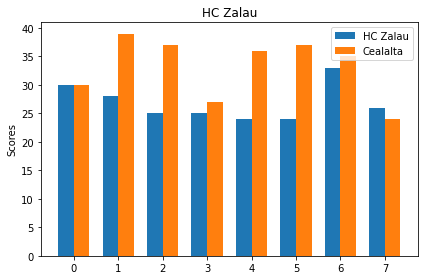

In [19]:
import numpy as np
import matplotlib.pyplot as plt

file = open("CLASAMENT_FINAL.txt", "w", encoding = "utf-8")

class jucatoare:
    def __init__(self, nume, echipa, s1, s2, s3, s4, s5):
        self.nume = nume
        self.echipa = echipa
        self.trageri_poarta = s1
        self.sansa_reusita = s2
        self.sansa_accidentare = s3
        self.pozitie = s4
        self.sansa_7metri = s5
    
class echipa:
    def __init__(self, nume):
        self.nume = nume
        self.lot = []
        self.w = 0
        self.d = 0
        self.l = 0
        self.golaveraj = [0,0]
        self.puncte = 0
        self.meciuri = []
    
    def adauga_jucatoare(self, jucatoare):
        self.lot.append(jucatoare)
        
    def final_joc(self, wdl, g_inscrise, g_primite, echipa_adversa):
        if wdl == 'W':
            self.w += 1
            self.puncte += 3
        elif wdl == 'D':
            self.d += 1
            self.puncte += 1
        else:
            self.l += 1
        self.meciuri.append((echipa_adversa, g_inscrise, g_primite))
        self.golaveraj[0] += g_inscrise
        self.golaveraj[1] += g_primite
        
j1 = jucatoare('Florentina Dragomir', 'CS Rapid Bucuresti', 12, 0.6, 0.04, 'pivot', 0.7)
j2 = jucatoare('Eliza Buceschi', 'CS Rapid Bucuresti', 14, 0.65, 0.023, 'centru', 0.75)
j3 = jucatoare('Marta López', 'CS Rapid Bucuresti', 20, 0.68, 0.021, 'extrema dreapta', 0.4)
j4 = jucatoare('Andreea Chiricuta', 'CS Rapid Bucuresti', 12, 0.62, 0.02, 'extrema stanga', 0.3)
j5 = jucatoare('Gabriela Perianu', 'CS Rapid Bucuresti', 15, 0.63, 0.025, 'inter stanga', 0.67)
j6 = jucatoare('Laura Popa', 'CS Rapid Bucuresti', 10, 0.66, 0.028, 'inter dreapta', 0.69)
j7 = jucatoare('Diana Ciucă', 'CS Rapid Bucuresti', 0, 0.3, 0, 'portar', 0.1)

Rapid = echipa('CS Rapid Bucuresti')
Rapid.adauga_jucatoare(j1)
Rapid.adauga_jucatoare(j2)
Rapid.adauga_jucatoare(j3)
Rapid.adauga_jucatoare(j4)
Rapid.adauga_jucatoare(j5)
Rapid.adauga_jucatoare(j6)
Rapid.adauga_jucatoare(j7)

j1 = jucatoare('Yvette Broch', 'CSM Bucuresti', 7, 0.62, 0.045, 'pivot', 0.71)
j2 = jucatoare('Denisa Valcan', 'CSM Bucuresti', 12, 0.6, 0.023, 'centru', 0.73)
j3 = jucatoare('Malin Aune', 'CSM Bucuresti', 9, 0.62, 0.021, 'extrema dreapta', 0.45)
j4 = jucatoare('Alexandra Dindiligan', 'CSM Bucuresti', 8, 0.61, 0.02, 'extrema stanga', 0.32)
j5 = jucatoare('Cristina Neagu', 'CSM Bucuresti', 20, 0.7, 0.035, 'inter stanga', 0.8)
j6 = jucatoare('Alicia Gogirla', 'CSM Bucuresti', 8, 0.67, 0.028, 'inter dreapta', 0.62)
j7 = jucatoare('Marie Davidsen', 'CSM Bucuresti', 0, 0.23, 0, 'portar', 0.1)

CSM = echipa('CSM Bucuresti')
CSM.adauga_jucatoare(j1)
CSM.adauga_jucatoare(j2)
CSM.adauga_jucatoare(j3)
CSM.adauga_jucatoare(j4)
CSM.adauga_jucatoare(j5)
CSM.adauga_jucatoare(j6)
CSM.adauga_jucatoare(j7)

j1 = jucatoare('Asma Elghaoui', 'SCM Ramnicu Valcea', 13, 0.64, 0.043, 'pivot', 0.75)
j2 = jucatoare('Elena Dache', 'SCM Ramnicu Valcea', 9, 0.67, 0.02, 'centru', 0.75)
j3 = jucatoare('Evghenia Levcenko', 'SCM Ramnicu Valcea', 9, 0.67, 0.02, 'extrema dreapta', 0.4)
j4 = jucatoare('Cristina Florica', 'SCM Ramnicu Valcea', 17, 0.64, 0.014, 'extrema stanga', 0.3)
j5 = jucatoare('Evgenija Minevskaja', 'SCM Ramnicu Valcea', 14, 0.7, 0.023, 'inter stanga', 0.6)
j6 = jucatoare('Olga Gorsenina', 'SCM Ramnicu Valcea', 13, 0.61, 0.024, 'inter dreapta', 0.68)
j7 = jucatoare('Daciana Hosu', 'SCM Ramnicu Valcea', 0, 0.25, 0, 'portar', 0.12)

SCM = echipa('SCM Ramnicu Valcea')
SCM.adauga_jucatoare(j1)
SCM.adauga_jucatoare(j2)
SCM.adauga_jucatoare(j3)
SCM.adauga_jucatoare(j4)
SCM.adauga_jucatoare(j5)
SCM.adauga_jucatoare(j6)
SCM.adauga_jucatoare(j7)

j1 = jucatoare('Nicoleta Safta', 'HC Dunărea Braila', 17, 0.62, 0.041, 'pivot', 0.7)
j2 = jucatoare('Ana Paula Rodrigues', 'HC Dunărea Braila', 13, 0.62, 0.022, 'centru', 0.69)
j3 = jucatoare('Catalina Preda', 'HC Dunărea Braila', 12, 0.67, 0.023, 'extrema dreapta', 0.5)
j4 = jucatoare('Larissa Araujo', 'HC Dunărea Braila', 10, 0.69, 0.019, 'extrema stanga', 0.43)
j5 = jucatoare('Samara da Silva', 'HC Dunărea Braila', 8, 0.69, 0.025, 'inter stanga', 0.59)
j6 = jucatoare('Amanda Kurtovic', 'HC Dunărea Braila', 14, 0.60, 0.03, 'inter dreapta', 0.6)
j7 = jucatoare('Elena Serban', 'HC Dunărea Braila', 0, 0.3, 0, 'portar', 0.11)

HC = echipa('HC Dunărea Braila')
HC.adauga_jucatoare(j1)
HC.adauga_jucatoare(j2)
HC.adauga_jucatoare(j3)
HC.adauga_jucatoare(j4)
HC.adauga_jucatoare(j5)
HC.adauga_jucatoare(j6)
HC.adauga_jucatoare(j7)

j1 = jucatoare('Mouna Jlezi', 'HC Zalau', 8, 0.63, 0.04, 'pivot', 0.65)
j2 = jucatoare('Loredana Vartic', 'HC Zalau', 13, 0.61, 0.02, 'centru', 0.69)
j3 = jucatoare('Cristina Mitrache', 'HC Zalau', 15, 0.68, 0.02, 'extrema dreapta', 0.54)
j4 = jucatoare('Andreea Mihart', 'HC Zalau', 16, 0.67, 0.01, 'extrema stanga', 0.47)
j5 = jucatoare('Emilija Lazic', 'HC Zalau', 7, 0.65, 0.02, 'inter stanga', 0.6)
j6 = jucatoare('Bianca Berbece', 'HC Zalau', 9, 0.69, 0.03, 'inter dreapta', 0.7)
j7 = jucatoare('Raluca Kelemen', 'HC Zalau', 0, 0.28, 0, 'portar', 0.11)

Zalau = echipa('HC Zalau')
Zalau.adauga_jucatoare(j1)
Zalau.adauga_jucatoare(j2)
Zalau.adauga_jucatoare(j3)
Zalau.adauga_jucatoare(j4)
Zalau.adauga_jucatoare(j5)
Zalau.adauga_jucatoare(j6)
Zalau.adauga_jucatoare(j7)

j5 = jucatoare('Cristina Neagu', 'CSM Bucuresti', 30, 0.80, 0.025, 'inter stanga', 0.8)

echipe = []
echipe.append(Rapid)
echipe.append(CSM)
echipe.append(SCM)
echipe.append(HC)
echipe.append(Zalau)

def probabilitate(p):
    if np.random.uniform() <= p:
        return 1
    return 0

def accidentari(echipa):
    accidentari = 0
    echipa_accidentari = echipa
    for jucator in echipa_accidentari.lot:
        if probabilitate(jucator.sansa_accidentare) == 1:
            accidentari += 1
            jucator.pozitie = "accidentare"
    return accidentari, echipa_accidentari
    
def echipa_super(echipa, accidentari):
    echipa_super = echipa
    for i in range(accidentari):
        for jucator in echipa_super.lot:
            if jucator.pozitie != "accidentare":
                if jucator.pozitie == "inter stanga" or jucator.pozitie == "inter dreapta" :
                    jucator.trageri_poarta += 0.2 * jucator.trageri_poarta
                elif jucator.pozitie == "extrema stanga" or jucator.pozitie == "extrema dreapta":
                     jucator.trageri_poarta += 0.3 * jucator.trageri_poarta
                if jucator.pozitie == "centru" or jucator.pozitie == "pivot":
                    jucator.sansa_reusita += 0.35 * jucator.sansa_reusita
                else: #portar
                    jucator.sansa_reusita += 0.15 * jucator.sansa_reusita
    return echipa_super
    
def joaca_acasa(echipa):
    echipa_super = echipa
    for jucator in echipa.lot:
        if jucator.pozitie != "accidentare":
            jucator.sansa_reusita += 0.2 * jucator.sansa_reusita
    return echipa_super

def factorial(n):
    p = 1
    for i in range(2, n + 1):
        p = p * i
    return p

def putere(a,b):
    p = 1
    for i in range(b):
        p = p * a;
    return p

def binomiala(p, n, k):
    return (factorial(n) / (factorial(k) * factorial(n - k))) * putere(p, k) * putere(1 - p, n - k)


def goluri_jucator(jucator):
    goluri = 0
    mx = 0    
    if jucator.pozitie != "accidentare" and jucator.pozitie != "portar":
        for i in range(int(jucator.trageri_poarta) + 1):
            probl = binomiala(jucator.sansa_reusita, int(jucator.trageri_poarta), i)
            if probl > mx:
                mx = probl
                goluri = i
        return goluri
    else:
        return 0

def apara_duckadam(sansa, goluri):
    aparari = 0
    mx = 0
    for i in range(goluri + 1):
        probl = binomiala(sansa, goluri, i)
        if probl > mx:
            mx = probl
            aparari = i
    return aparari
        
def zi_proasta(echipaa):
    jucatoare_afectate = []
    echipa = echipaa
    for jucator in echipa.lot:
        if probabilitate(0.15) == 1:
            jucator.trageri_poarta = 0.70 * jucator.trageri_poarta 
            jucator.sansa_reusita = 0.70 * jucator.sansa_reusita
            jucator.sansa_accidentare +=  0.30 * jucator.sansa_accidentare
            jucator.sansa_7metri = 0.70 * jucator.sansa_7metri
            jucatoare_afectate.append(jucator)
    return echipa, jucatoare_afectate

def lovituri_7m(echipa1, echipa2):
    jucator = echipa1.lot[np.random.randint(low = 1, high = 7)]
    if probabilitate(jucator.sansa_7metri) == 1: #jucatoarea "ar da gol"
        if probabilitate(echipa2.lot[6].sansa_reusita) == 0:  #portarul celeilalte echipe nu apara
            return 1
    return 0
        
def meci(echipaa1, echipaa2, c):
    goluri_e1 = 0
    goluri_e2 = 0
    
    j_zi_proasta1 = []
    j_zi_proasta2 = []
    echipa1, j_zi_proasta1 = zi_proasta(echipaa1) #jucatoarele pierd din statistici daca au o zi proasta
    echipa2, j_zi_proasta2 = zi_proasta(echipaa2) #jucatoarele pierd din statistici daca au o zi proasta 
    
    (accidentari1, echipa1) = accidentari(echipa1) #jucatoarele se accidenteaza
    (accidentari2, echipa2) = accidentari(echipa2) #jucatoarele se accidenteaza
    
    if accidentari1 != 0:
        echipa1 = echipa_super(echipa1, accidentari1) #pentru fiecare accidentare, celelalte jucatoare primesc bonusuri la statisitici
        echipa1 = joaca_acasa(echipa1) #jucatoarele care joaca pe teren propriu primesc bonus la statistici
    
    if accidentari2 != 0:
        echipa2 = echipa_super(echipa2, accidentari2)
    for jucator1 in echipa1.lot:
        goluri_e1 += goluri_jucator(jucator1)
    for jucator2 in echipa2.lot:
        goluri_e2 += goluri_jucator(jucator2)
        
    
    for i in range(accidentari1):
        goluri_e1 += lovituri_7m(echipa1, echipa2) # cate accidentari, atatea lovituri de la 7m
    for i in range(accidentari2):
        goluri_e2 += lovituri_7m(echipa2, echipa1)
    
    goluri_aparate1 = apara_duckadam(echipa1.lot[6].sansa_reusita, goluri_e1) # din toate golurile, portarii mai apara cateva
    goluri_aparate2 = apara_duckadam(echipa2.lot[6].sansa_reusita, goluri_e2)
    goluri_e1_f = goluri_e1 - goluri_aparate1
    goluri_e2_f = goluri_e2 - goluri_aparate2
    
    if goluri_e1_f > goluri_e2_f:
        echipaa1.final_joc('W', goluri_e1_f, goluri_e2_f, echipaa2.nume)
        echipaa2.final_joc('L', goluri_e2_f, goluri_e1_f, echipaa1.nume)
    elif goluri_e2_f > goluri_e1_f:
        echipaa1.final_joc('L', goluri_e1_f, goluri_e2_f, echipaa2.nume)
        echipaa2.final_joc('W', goluri_e2_f, goluri_e1_f, echipaa1.nume)
    else:
        echipaa1.final_joc('D', goluri_e1_f, goluri_e2_f, echipaa2.nume)
        echipaa2.final_joc('D', goluri_e2_f, goluri_e1_f, echipaa1.nume)
        
    file.write(f'Meciul cu numarul {c}, disputat intre {echipaa1.nume} si {echipaa2.nume} s-a terminat cu scorul de {goluri_e1_f}-{goluri_e2_f}.\n')
    file.write(f'Portarii celor 2 formatii au aparat {goluri_aparate1} respectiv {goluri_aparate2} de goluri.\n')
    file.write('------------------Accidentari------------------\n')
    if accidentari1 == 0:
        file.write(f'Din echipa {echipaa1.nume} nu s-a accidentat nicio jucatoare.')
    else:
        file.write(f'Din echipa {echipaa1.nume} s-au accidentat: ')
        for jucator in echipa1.lot:
            if jucator.pozitie == "accidentare":
                file.write(jucator.nume + '    ')
    file.write('\n')
    if accidentari2 == 0:
        file.write(f'Din echipa {echipaa2.nume} nu s-a accidentat nicio jucatoare.')
    else:
        file.write(f'Din echipa {echipaa2.nume} s-au accidenta: ')
        for jucator in echipa2.lot:
            if jucator.pozitie == "accidentare":
                file.write(jucator.nume + '    ')
    file.write('\n')

    file.write('--------Jucatoare care au avut o zi rea--------\n')
    if len(j_zi_proasta1) == 0:
        file.write(f'Nicio jucatoare din {echipaa1.nume} nu a avut o zi rea.')
    else:
        file.write(f'Din echipa {echipaa1.nume}, urmatoarele jucatoare au avut o zi nasola: ')
        for jucator in j_zi_proasta1:
                file.write(jucator.nume + '    ')
    file.write('\n')
    if len(j_zi_proasta2) == 0:
        file.write(f'Nicio jucatoare din {echipaa2.nume} nu a avut o zi rea.')
    else:
        file.write(f'Din echipa {echipaa2.nume}, urmatoarele jucatoare au avut o zi nasola: ')
        for jucator in j_zi_proasta2:
                file.write(jucator.nume + '    ')
    file.write('\n\n\n')
  
def cmp(x):
    return -x.puncte, -x.golaveraj[0] / x.golaveraj[1]

def grafic(echipa):
    labels = [x[0] for x in echipa.meciuri]
    pl1 = [x[1] for x in echipa.meciuri]
    pl2 = [x[2] for x in echipa.meciuri]
    x = np.arange(len(labels))  # the label locations
    width = 0.35
    fig, ax = plt.subplots()
    rects1 = ax.bar(x - width/2, pl1, width, label=echipa.nume)
    rects2 = ax.bar(x + width/2, pl2, width, label='Cealalta')
    ax.set_ylabel('Scores')
    ax.set_title(echipa.nume)
    ax.legend()
    fig.tight_layout()
    plt.show()

def campionatul_liga_florilor():
    nr = 0
    for echipa1 in echipe:
        for echipa2 in echipe:
            if echipa1 != echipa2:
                nr += 1
                meci(echipa1, echipa2, nr)
    file.write("CLASAMENT FINAL:\n")
    echipe.sort(key = cmp)
    nr = 1
    for echipa in echipe:
        file.write(f'Locul {nr}. {echipa.nume} cu {echipa.puncte} puncte (golaveraj: {echipa.golaveraj[0] / echipa.golaveraj[1]:.2f}), rezultate din {echipa.w} victorii, {echipa.d} remize si {echipa.l} infrangeri.\n')
        nr += 1
    file.close()
    print("Privire de ansamblu:")
    for echipa in echipe:
        grafic(echipa)

            
campionatul_liga_florilor()